# Decision Tree Modeling and Optimization

# Introduction

In this analysis, we'll be exploring the application of the Decision Tree model on the Olist dataset with the objective of predicting sales revenue for each specific product. We'll commence by partitioning the data into dependent (Y) and independent (X) variables. Then, the data will be split further into training, testing, and validation sets to ensure a robust model training and evaluation process.
Once the model is trained, we will evaluate its performance using suitable metrics. Based on the evaluation results, we will attempt to optimize the model for better prediction accuracy.
Ultimately, we'll ascertain the efficacy of the Decision Tree model in predicting the sales revenue not just for individual products, but also across different product categories in the entire dataset. This analysis aims to provide a comprehensive understanding of the model's capabilities and its potential applications in sales forecasting.

In [1]:
# import the relevant libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

We begin by loading our cleaned dataset, where irrelevant features have been removed.

In [2]:
# Load the data 
df = pd.read_csv('Olist_Final.csv')
df.head()

,product_id,item_price,freight_value,payment_sequential,payment_type,payment_installments,order_purchase_timestamp,review_score,postal_code,state,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,sales_revenue
0,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,1,1,2,2017-09-13 08:59:00,5,28013,18,cool_stuff,650.0,28.0,9.0,14.0,58.9
1,4244733e06e7ecb4970a6e2683c13e61,55.9,17.96,1,0,1,2017-06-28 11:52:00,5,75800,8,cool_stuff,650.0,28.0,9.0,14.0,55.9
2,4244733e06e7ecb4970a6e2683c13e61,64.9,18.33,1,1,2,2018-05-18 10:25:00,4,30720,10,cool_stuff,650.0,28.0,9.0,14.0,64.9
3,4244733e06e7ecb4970a6e2683c13e61,58.9,16.17,1,1,3,2017-08-01 18:38:00,5,83070,17,cool_stuff,650.0,28.0,9.0,14.0,58.9
4,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,1,1,4,2017-08-10 21:48:00,5,36400,10,cool_stuff,650.0,28.0,9.0,14.0,58.9


## Data Scaling and Decision Tree Analysis

We then designate our data to independent (X) and dependent (Y) variables. As 'product_id' is an essential feature for our product-specific predictions, we initially create a copy of it before dropping it from the X variable. Following this, we split the data into training and test sets. For a more comprehensive model evaluation, we further partition our training data into separate subsets for training and validation.

In [3]:
# Drop the defined columns from the dataframe to form feature set 'X'.
X = df.drop(['sales_revenue'], axis=1)

# Assign 'sales_revenue' column as the target variable 'y'.
y = df['sales_revenue']

# Keep a copy of the Product IDs for the test set before dropping from X
X_Product_IDs = X['product_id'].copy()

# Drop the non-numeric columns from X
X = X.drop(['product_id', 'order_purchase_timestamp', 'product_category_name'], axis=1)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Then, we training a Decision Tree Regressor on our training data (X_train and y_train). Once trained, the model is used to predict the dependent variable (y_test) using our test data (X_test).

In [4]:
# Train a DecisionTreeRegressor on 'X_train' and 'y_train', then predict 'y_test' using 'X_test'.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)
tree_regressor = DecisionTreeRegressor()  
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

Now, we evaluate the performance of our Decision Tree Regressor. We calculate several key metrics by comparing the true target values (y_test) with the model's predictions (y_pred). These include the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R^2) score. Through these measurements, we gain insights into the accuracy and reliability of our model's predictions.

In [5]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 9797.257378694221
Mean Absolute Error: 25.176955286918982
R^2 Score: 0.7821330243670892


Looking at the above Decision Tree Regressor's performance, key results stand out. An MSE of 9797.25 represents the average squared difference between actual and predicted outcomes. The MAE, at 25.04, signifies the average difference between the actual and predicted values. The model's R^2 score is 0.78, indicating that about 78% of the variability in the sales revenue can be explained by our model's features. This score suggests a reasonable degree of prediction accuracy.

In [6]:
# Predict on the validation and test data
y_pred_val_tree = tree_regressor.predict(X_val)
y_pred_test_tree = tree_regressor.predict(X_test)

# Evaluate the model
mse_val_tree = mean_squared_error(y_val, y_pred_val_tree)
mse_test_tree = mean_squared_error(y_test, y_pred_test_tree)

print("Decision Tree MSE validation: ", mse_val_tree)
print("Decision Tree MSE test: ", mse_test_tree)

Decision Tree MSE validation:  17213.587839140233
Decision Tree MSE test:  9797.257378694221


Also, the above infor represents that following these predictions, the model's performance is evaluated using Mean Squared Error (MSE) for both the validation and test datasets. The MSE results indicate how close the predictions are to the actual values, with lower scores reflecting better model accuracy. The specific MSE values obtained from the validation and test data provide insight into the model's prediction capability and overall reliability.

# Optimizing the Model

Let's now explore whether the model can be further optimized by employing enhanced fitting techniques. To this end, a decision tree model is constructed using the optimal parameters: maximum depth of 7, minimum samples per leaf as 1, and minimum samples required to split a node set to 2, with a fixed random state of 42 for reproducibility. This refined model is then trained on the existing data. Subsequently, it's used to make predictions on the unseen test data, and the results are stored for further analysis and comparison.

In [7]:
# The best model after tuning
best_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Fit the model to the training data
best_tree.fit(X_train, y_train)

# Use the model to make predictions on unseen data
y_pred = best_tree.predict(X_test)

The enhanced model is now put to the test, first on the validation and subsequent on the test sets.

In [8]:
# Make predictions on the validation set
y_val_pred = best_tree.predict(X_val)

# Calculate the MSE for the validation set
mse_val = mean_squared_error(y_val, y_val_pred)

print(f"Validation MSE: {mse_val}")

# Make predictions on the test set
y_test_pred = best_tree.predict(X_test)

# Calculate the MSE for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")

Validation MSE: 16410.618209911692
Test MSE: 8354.158396992216


Based on above results the improved model delivers a Mean Squared Error (MSE) of 16410.62 on the validation set, and a notably lower MSE of 8354.16 on the test set. These figures indicate that the refined model has improved in terms of accuracy, particularly when predicting unseen data in the test set. Despite the higher MSE value for the validation set, the substantial reduction in the test MSE suggests that our model adjustments have been successful.

To discern the most influential features in our model's predictions, let's examine the 'feature_importances_' attribute of our tuned model. This attribute returns an array of importance scores corresponding to each feature in our dataset. By visualizing these scores through a bar plot, we can readily identify and understand which features wield the most impact on our predictions.

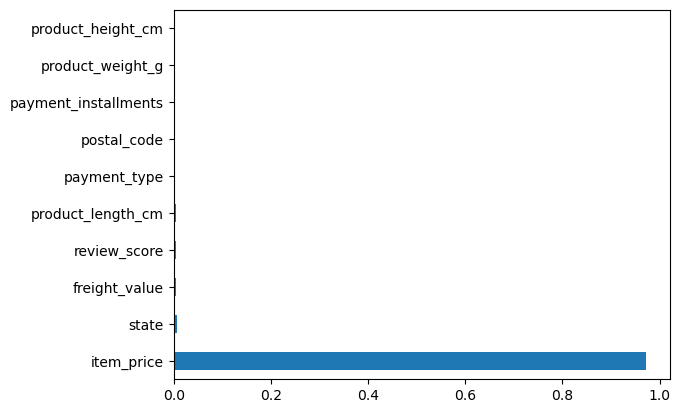

In [9]:
# Plot the 10 most important features of the trained decision tree model.
feat_importances = pd.Series(best_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

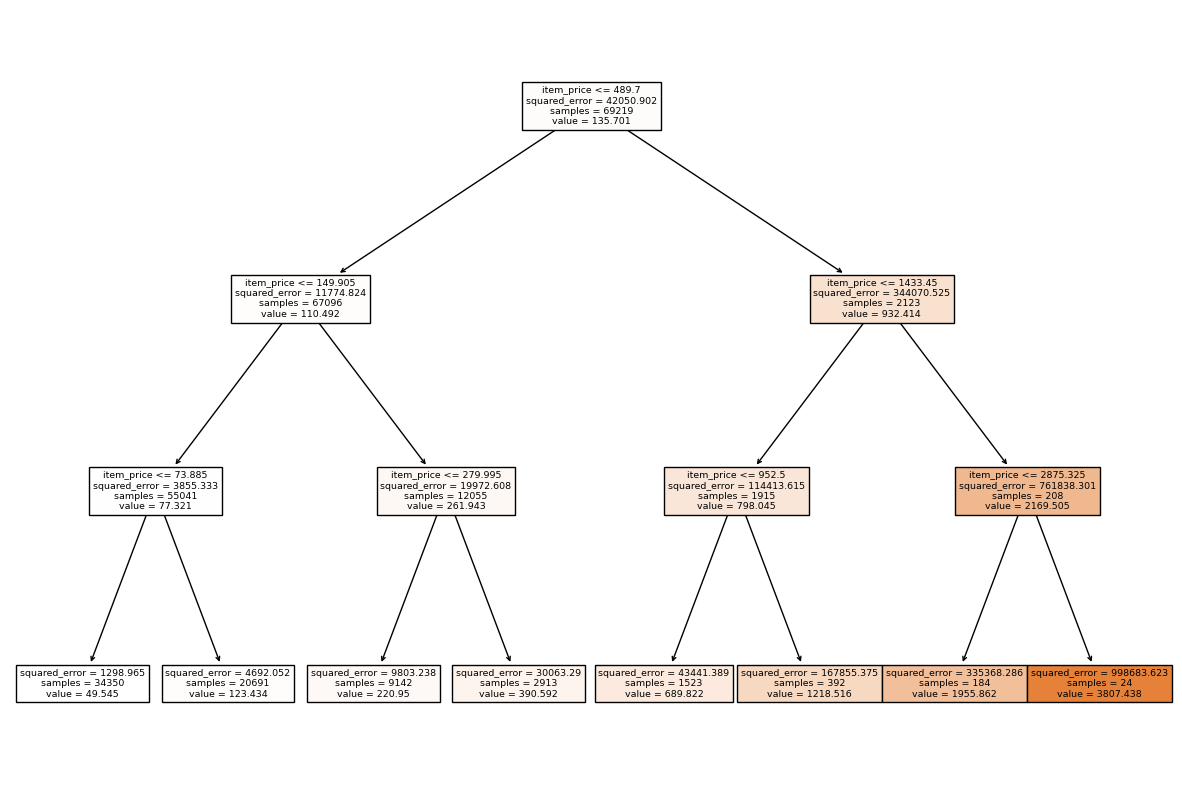

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

# Train a Decision Tree with a smaller max_depth, e.g., 3
small_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)
small_tree.fit(X_train, y_train)

# Plot the smaller tree
plt.figure(figsize=(15,10))
tree.plot_tree(small_tree, filled=True, feature_names=X_train.columns)
plt.show()

To enhance our model's performance, the next step is to prune unnecessary features from our dataset. By doing so, we aim to streamline our model, potentially improving its prediction accuracy. Let's proceed with this process and observe the impact on our model's performance.

In [11]:
# Drop the defined columns from the dataframe to form feature set 'X'.
X = df.drop(['sales_revenue', 'product_width_cm','product_height_cm'], axis=1)

# Assign 'sales_revenue' column as the target variable 'y'.
y = df['sales_revenue']

# Keep a copy of the Product IDs for the test set before dropping from X
X_Product_IDs = X['product_id'].copy()

# Drop the non-numeric columns from X
X = X.drop(['product_id','order_purchase_timestamp','payment_type','state','product_category_name','postal_code','payment_installments','payment_sequential','review_score','product_length_cm','product_weight_g'] , axis=1)

# Proceed with train/test split as normal
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split train_val set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

Next, the model is re-run to assess the impact of the recent adjustments. This will provide insight into how the model performs post-optimization and whether the feature selection process has yielded any improvement in prediction accuracy.

In [12]:
# Split data into training, validation, and test sets, train a DecisionTreeRegressor, and predict 'y_test'.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)
tree_regressor = DecisionTreeRegressor()  
tree_regressor.fit(X_train, y_train)

y_pred = tree_regressor.predict(X_test)

In [13]:
# Calculate and print Mean Absolute Error (MAE) and R^2 score for the model's predictions.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 23.747078073895135
R^2 Score: 0.7938928216062957


Based on the results, the evaluation metrics of the optimized model exhibit the following results: The Mean Absolute Error (MAE) stands at 23.74, pointing to an average absolute deviation between the actual and predicted sales revenue. Furthermore, the R-squared (R^2) score has improved to 0.79, meaning around 79% of the variance in sales revenue can now be explained by the model's features. This indicates an enhancement in the model's performance post-optimization.

Next, the performance of the optimized model is evaluated using cross-validation. We will try the 'cross_val_score' function from the sklearn library to estimate the model's performance on unseen data. Ten-fold cross-validation and Mean Squared Error (MSE) are used as the scoring metric. The reported MSE scores for each fold and their mean provide further insight into the model's prediction reliability and overall consistency

In [14]:
# Perform cross-validation, compute MSE scores, and print them along with their mean.
scores = cross_val_score(best_tree, X_train_val, y_train_val, scoring='neg_mean_squared_error', cv=10)
mse_scores = -scores

print("MSE scores: ", mse_scores)
print("MSE mean: ", mse_scores.mean())

MSE scores:  [ 4117.85710934  9864.55998579  5361.45422866  5916.37138947
 13126.43242502 10319.17268887  6486.63835023 10077.20037301
  7781.31710288  5589.38506374]
MSE mean:  7864.038871703303


The cross-validation revealed MSE scores varying between approximately 4117 and 13126, indicative of differences in each fold's performance. With an average MSE score of around 7864, the model displays a reasonable degree of accuracy across all folds.

Now, we will use the original validation set as our new test set, and the original test set as our new validation set

In [15]:
# Refit the model on the training data
best_tree.fit(X_train, y_train)

# Predict on the new validation set (original test set)
y_val_pred = best_tree.predict(X_test)

# Calculate the MSE for the new validation set
mse_val = mean_squared_error(y_test, y_val_pred)

print(f"New Validation MSE: {mse_val}")

# Predict on the new test set (original validation set)
y_test_pred = best_tree.predict(X_train_val)

# Calculate the MSE for the new test set
mse_test = mean_squared_error(y_train_val, y_test_pred)

print(f"New Test MSE: {mse_test}")

New Validation MSE: 7454.372830242151
New Test MSE: 7513.581462916866


The recalculated Mean Squared Errors (MSE) for the new validation set and new test set are 7454.37 and 7513.58, respectively. These scores demonstrate that the model's performance remains relatively consistent even when the validation and test sets are switched, indicating its robustness and versatility in making predictions across different datasets.

To closely examine our model's performance, in bellow, we create a DataFrame, 'compare_df', which is set up to inspect our model's predictions. It contains 'product_id', 'order_purchase_timestamp', and 'product_category_name' for the products in the test set. The model's predicted revenue for these products is added as a new column, 'predicted_revenue'. This setup lets us compare the model's predicted and actual sales revenues product by product.

In [16]:
# Define compare_df first
compare_df = df[['product_id', 'order_purchase_timestamp', 'product_category_name']].copy()

# Now subset it
compare_df = compare_df.loc[X_test.index]

# Add the predicted values
compare_df['predicted_revenue'] = y_pred

# Print out compare_df
compare_df

,product_id,order_purchase_timestamp,product_category_name,predicted_revenue
79496,cf3aebf1fe742d73907fed51ead1945c,2018-07-21 12:22:00,furniture_decor,119.900000
693,1fe8e6e01596885617fa1c90d29c2f81,2017-04-10 13:54:00,health_beauty,81.250000
18245,db0e75ba1fc6537d68f2676f3b67d07f,2018-07-20 18:59:00,cool_stuff,249.990000
30359,41c24b8ce92d1a2cac62db5edfd088b2,2018-06-22 11:16:00,watches_gifts,99.900000
63301,e0cf79767c5b016251fe139915c59a26,2018-08-05 21:50:00,health_beauty,33.488000
...,...,...,...,...
39731,e9def91e99c8ecb7c5cef5e31506a056,2017-11-26 20:36:00,toys,69.990000
92284,06601c3059e35a3bf65e72f2fd2ac626,2018-08-29 11:06:00,food,109.900000
23099,26e253f334cf93847fcbf6e9faf51eb4,2018-02-01 23:20:00,sports_leisure,169.000000
29587,ee3d532c8a438679776d222e997606b3,2018-02-22 15:30:00,computers_accessories,884.615385


In [17]:
# Add 'sales_revenue' and 'difference' (between actual and predicted revenue) columns to 'compare_df'.
compare_df['sales_revenue'] = y_test
compare_df['difference'] = compare_df['sales_revenue'] - compare_df['predicted_revenue']

In [18]:
compare_df.groupby('product_category_name').mean()

C:\Users\Work&Study\AppData\Local\Temp\ipykernel_15048\623643391.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  compare_df.groupby('product_category_name').mean()


,predicted_revenue,sales_revenue,difference
product_category_name,,,
agro_industry_and_commerce,593.811101,449.802453,-144.008648
air_conditioning,194.052019,207.493793,13.441774
art,96.112660,94.985957,-1.126702
arts_and_craftmanship,66.081429,71.840000,5.758571
audio,149.945732,149.186849,-0.758883
...,...,...,...
stationery,94.783700,94.595122,-0.188578
tablets_printing_image,96.563175,90.518182,-6.044993
telephony,85.051551,84.549432,-0.502118


For further evaluation of the model's performance, a bar chart is generated to visually compare the average actual and predicted revenues by product category. Data is aggregated on 'product_category_name' to get the mean values of 'sales_revenue' and 'predicted_revenue'. The chart helps to understand how well the model has performed in predicting the average sales revenue across different product categories, which is a crucial aspect in assessing the utility of the model for business decision making.

C:\Users\Work&Study\AppData\Local\Temp\ipykernel_15048\2729008085.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = compare_df.groupby('product_category_name').mean()[['sales_revenue', 'predicted_revenue']]


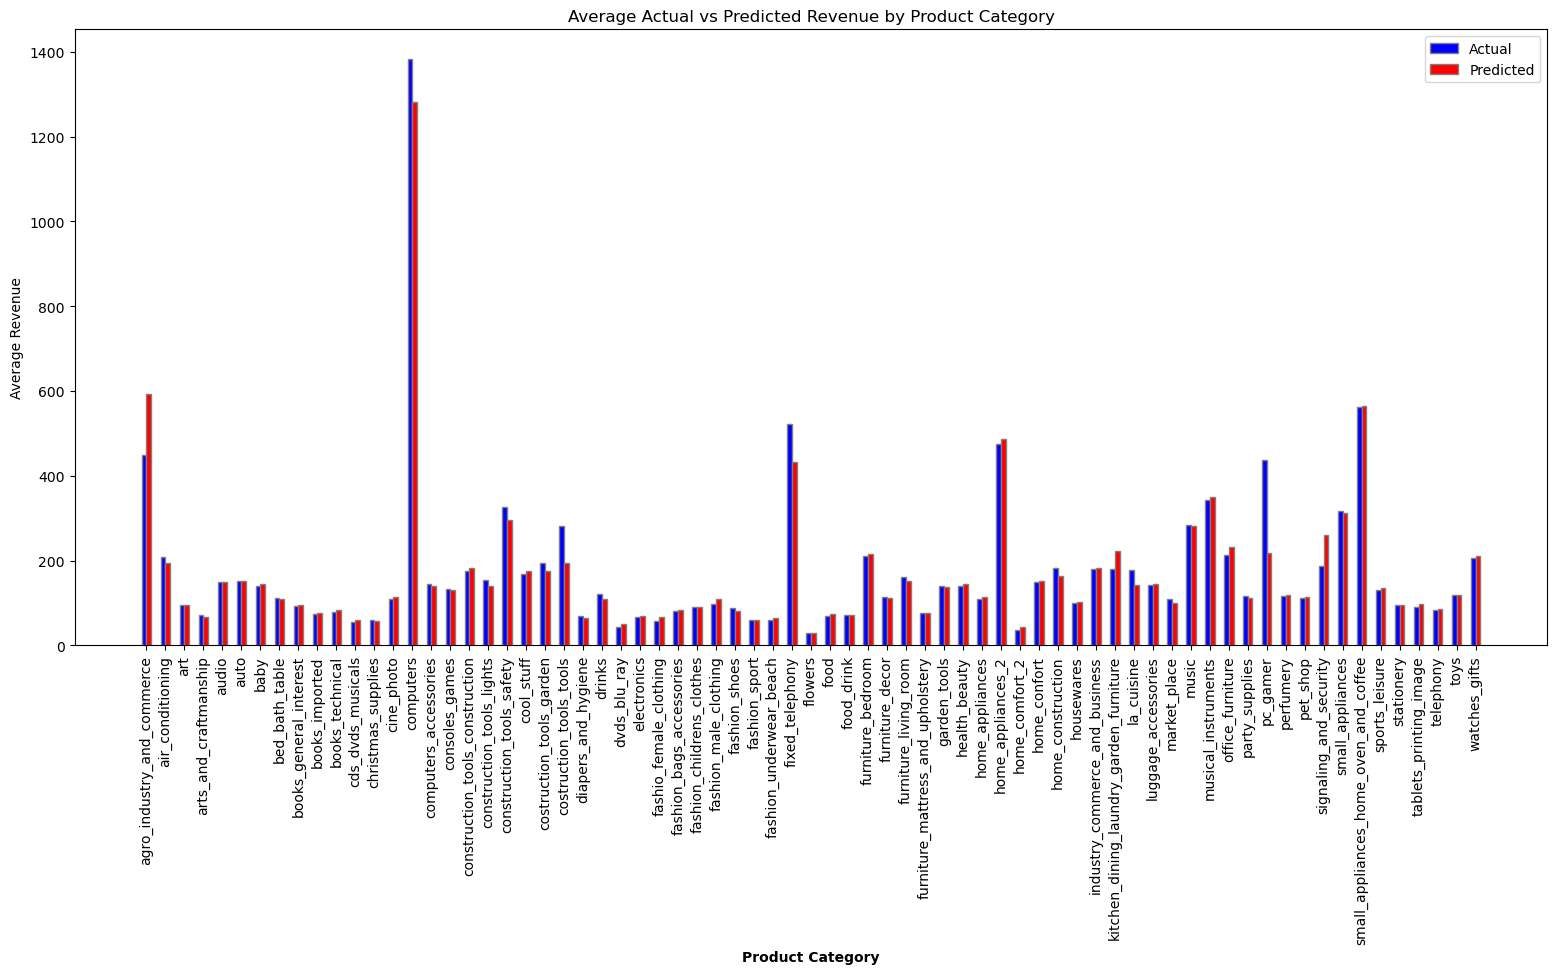

In [19]:
# Aggregate data
grouped = compare_df.groupby('product_category_name').mean()[['sales_revenue', 'predicted_revenue']]

# Generate x-coordinates for the bars
barWidth = 0.25
r1 = np.arange(len(grouped))
r2 = [x + barWidth for x in r1]

# Create bar plot
plt.figure(figsize=(19, 8))
plt.bar(r1, grouped['sales_revenue'], color='b', width=barWidth, edgecolor='grey', label='Actual')
plt.bar(r2, grouped['predicted_revenue'], color='r', width=barWidth, edgecolor='grey', label='Predicted')

# Add xticks on the middle of the group bars
plt.xlabel('Product Category', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(grouped))], grouped.index, rotation=90)

plt.ylabel('Average Revenue')
plt.title('Average Actual vs Predicted Revenue by Product Category')
plt.legend()

plt.show()

The above chart demonstrates a commendable alignment between actual and predicted sales revenues across product categories. The close proximity of the red (predicted) and blue (actual) bars for each category suggests that the Decision Tree Regressor model has done a commendable job in predicting the sales revenue. This highlights the model's effectiveness in capturing the underlying patterns in the data and its potential applicability for future sales forecasting tasks.

# Conclusion

In concluding, the decision tree model proved useful in predicting sales revenue for different products. It correctly estimated about 79% of the sales changes and showed consistency in different tests. Also, the model's predictions were close to the actual sales across multiple product categories. This suggests the model's effectiveness and potential use in real-world scenarios.